In [4]:
#save and load models
from sklearn import joblib

filename = 'model.sav'
joblib.dump(clf, filename)
clf = joblib.load(filename)




In [3]:
# simple example
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import joblib

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Resutl: ", metrics.accuracy_score(y_test, y_pred))
joblib.dump(classifier, 'knn_classifier.joblib')
joblib.load('knn_classifier.joblib')


Resutl:  0.9833333333333333


KNeighborsClassifier(n_neighbors=3)

In [30]:
# preprocessing
import numpy as np
from sklearn import preprocessing

X = [[0.3, 41.4],[0.5, 65.0], [0.2, 87.5]]
X_scaled = preprocessing.scale(data_in)
print("Input data:\n ", X)
print("After scaling\n ", X_scaled)
# data_binarized = preprocessing.Binarizer(treshold=0.5).transform(input_data)

sc = preprocessing.StandardScaler()
x_sc = sc.fit_transform(X)
print("Standard tranformn: ", x_sc)
sc.inverse_transform(x_sc)

min_max_scaler = preprocessing.MinMaxScaler()
x_mm_scaled = min_max_scaler.fit_transform(X)
print("min max scaler tranform\n ", x_mm_scaled)

nm = preprocessing.Normalizer(norm='l1') # L1 - sum of abs values is 1.0 in  each row, L2 - sum of squares is 1.0 in each row
normalized_data = nm.fit_transform(X)
normalized_data = preprocessing.normalize(X, norm='l1') # same result as above 2 lines
print('Normalization\n', normalized_data)

X = [['Basketball','Male','USA'],['Football','Female','UK']]
ohe = preprocessing.OneHotEncoder()
x_encoded = ohe.fit_transform(X)
print("Input data: ", X)
print('OneHotEncoder\n ', x_encoded.toarray())
print(ohe.categories_)

Input data:
  [[0.3, 41.4], [0.5, 65.0], [0.2, 87.5]]
After scaling
  [[-0.26726124 -1.23436903]
 [ 1.33630621  0.01948072]
 [-1.06904497  1.21488831]]
Standard tranformn:  [[-0.26726124 -1.23436903]
 [ 1.33630621  0.01948072]
 [-1.06904497  1.21488831]]
min max scaler tranform
  [[0.33333333 0.        ]
 [1.         0.51193059]
 [0.         1.        ]]
Normalization
 [[0.00719424 0.99280576]
 [0.00763359 0.99236641]
 [0.0022805  0.9977195 ]]
Input data:  [['Basketball', 'Male', 'USA'], ['Football', 'Female', 'UK']]
OneHotEncoder
  [[1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]]
[array(['Basketball', 'Football'], dtype=object), array(['Female', 'Male'], dtype=object), array(['UK', 'USA'], dtype=object)]


In [42]:
# playing with sklearn

from sklearn.datasets import load_iris
import pprint

iris = load_iris()
print(type(iris))
print(iris.target_names)
print(type(iris.data))
print(iris.feature_names)
print(iris.DESCR)


<class 'sklearn.utils.Bunch'>
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    p

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


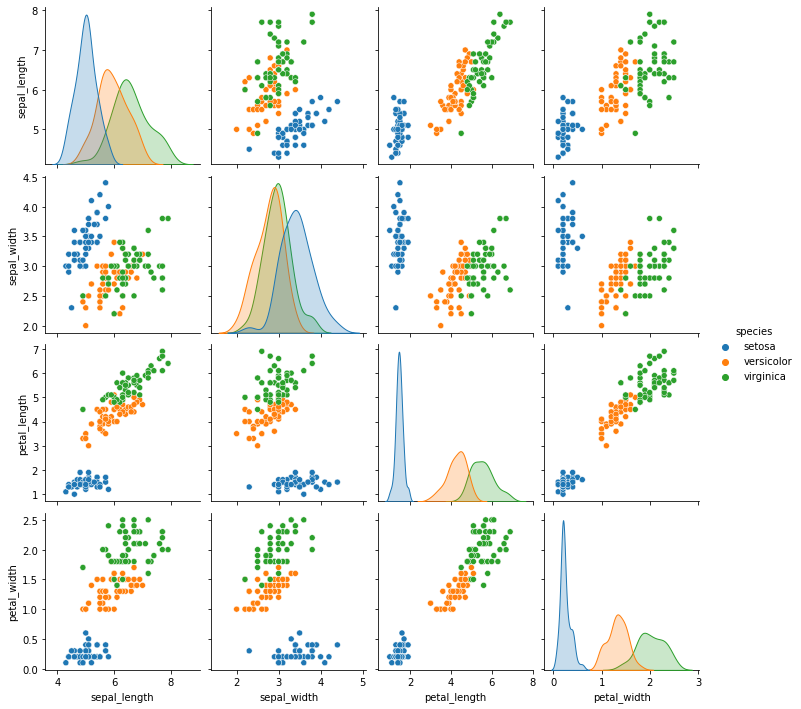

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
print(df.head())
sns.pairplot(df, hue='species')
plt.show()

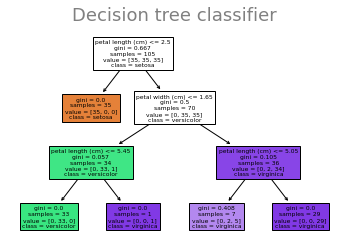

[0.         0.         0.56389932 0.43610068]
0.9555555555555556


In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)
model = DecisionTreeClassifier(max_depth=3, random_state=100)
model.fit(X_train, y_train)

plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision tree classifier', size=18, color='grey')
plt.show()
print(model.feature_importances_)

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
import pandas as pd

df = load_dataset('penguins')
df = df.dropna()
X = df.drop(columns = ['species'])
print(df.head())

#X = df.select_dtypes(include='number')
print(X.columns)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

column_transformer = make_column_transformer((OneHotEncoder(), ['island', 'sex']), (MinMaxScaler(), ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']), remainder = 'passthrough')
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())


model = KNeighborsClassifier(p=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(accuracy)
# print(df.head)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  
Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')
1.0


In [20]:
# hyperparameter searching
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparams_dict = {'n_neighbors': range(1, 15, 2),
                    'p': [1, 2],
                    'weights': ['uniform', 'distance']
    }

hyperparams_searcher = GridSearchCV(KNeighborsClassifier(), hyperparams_dict, n_jobs=5, verbose=1)
hyperparams_searcher.fit(X_train, y_train)
print(hyperparams_searcher.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [18]:
from sklearn.neighbors import KNeighborsClassifier

help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


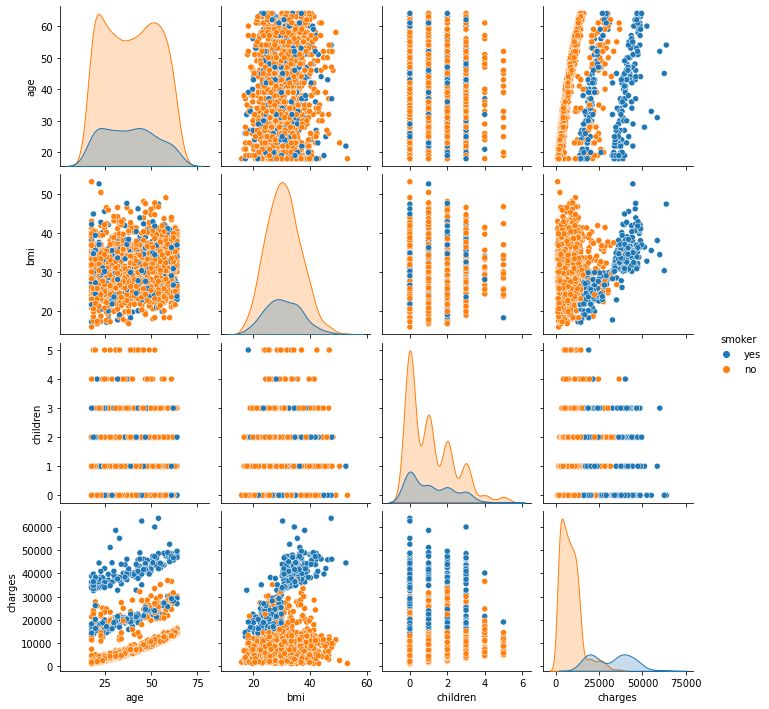

In [27]:
# linear regression

import pandas as pd
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
data.head()
print(data.corr()) 
#correlation coefficients are <-1,1>, -1 means vars are inversly correlated, and 0 they are not correlated
sns.pairplot(data, hue='smoker') #hue labels data woth colors


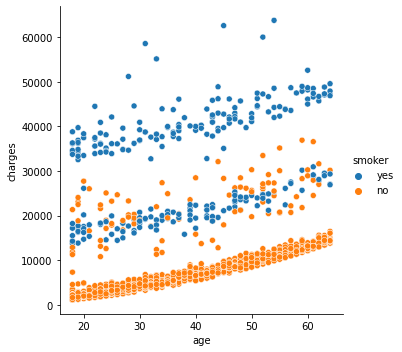

In [32]:
# sns.relplot(data=df, y='charges', x='age', hue='smoker')
sns.relplot(data=data, x='age', y='charges', hue='smoker')
# plt.show()


In [33]:
non_smokers = data[data['smoker'] == 'no']
non_smokers.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [73]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics

df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
df['smoker_int'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex_int'] = df['sex'].map({'female': 1, 'male': 0})
column_transformer = make_column_transformer((OneHotEncoder(), ['region']), remainder="passthrough")

# non_smokers = df[df['smoker'] == 'no']
 
X = df[['age', 'bmi', 'smoker_int', 'sex_int', 'region']] # apparently with array of column names we get dataframe and with single column name dataserie
X = column_transformer.fit_transform(X)
X = pd.DataFrame(data=X, columns=column_transformer.get_feature_names_out())
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_r2 = metrics.r2_score(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print('r2_score', accuracy_r2) # <0-100%> the higher the better; read more about it
print('rmse', rmse)

print('coefs: ', model.coef_)
print('model_intercept',model.intercept_)



r2_score 0.7054011700107801
rmse 6251.375749594023
coefs:  [  437.93979451   572.0328273   -621.78846481  -388.184157
   253.50906677   338.46399175 24311.72839812   213.15486074]
model_intercept -12042.805898321321


In [62]:
#predicting with linear regression

coef = model.coef_
intercept = model.intercept_

def predict_charges(age, bmi, is_smoker):
    return coef[0] * age + coef[1] * bmi + coef[2] *is_smoker + intercept
    
print("should be low", predict_charges(25, 20, 0))

print("should be high", predict_charges(75, 30, 1))

print('example: ', predict_charges(33, 22, 0))
    

should be low 1183.3128227523557
should be high 41592.31524883014
example:  3958.7544529373754


In [74]:
column_transformer.get_feature_names_out()

array(['onehotencoder__region_northeast',
       'onehotencoder__region_northwest',
       'onehotencoder__region_southeast',
       'onehotencoder__region_southwest', 'remainder__age',
       'remainder__bmi', 'remainder__smoker_int', 'remainder__sex_int'],
      dtype=object)